<h3>AI/ML Course - Week 2</h3>

<p>Mariano Salcedo - mariano.salcedo@nokia.com</p>


In [1]:
import glob
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
path =r'C:\python_sqm\data\raw\AI-ML_Nokia'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, delimiter=","))

# Concatenate all data into one DataFrame
iris = pd.concat(dfs, ignore_index=True)

In [3]:
iris.head(3)

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [4]:
# Let's create a new dataframe without id field, as it does not provide 
# any information for exploratory analysis
iris_df=iris.drop(columns=['id'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df.groupby(iris_df['Species']).size().reset_index(name='counts')

,Species,counts
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


## Convert Categorical features to numerical values
Let's replace each specie name for a numerical value, as some of the classification algorithms do not handle text variables 

In [6]:
iris_df['Species'].replace(to_replace=['Iris-setosa','Iris-versicolor', 'Iris-virginica'], value=[1,2,3],inplace=True)

In [7]:
iris_df.groupby(iris_df['Species']).size().reset_index(name='counts')

,Species,counts
0,1,50
1,2,50
2,3,50


## Feature and label dataframes

Let's split the iris dataframe into feature and Label DF


In [8]:
X=iris_df.drop(['Species'], axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y=iris_df['Species']
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: Species, dtype: int64

## Normalize Data

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [10]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [11]:
from sklearn.model_selection import train_test_split
import random

seed = 0
random.seed(0)
np.random.seed(0)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=seed)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (105, 4) (105,)
Test set: (45, 4) (45,)


# Classification

## 1. K Nearest Neighbor(KNN)


In [12]:
from sklearn.neighbors import KNeighborsClassifier


In [13]:
k = 3
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=3)

n_neighbors represents the number of neighbors to use for kneighbors queries. Using n_neighbors=1 means </br>
each sample is using itself as reference, that’s an overfitting case. 
For our data, increasing the number of neighbors improves the test scores

In [14]:
yhat = knn.predict(X_test)
yhat[0:5]

array([3, 2, 1, 3, 1], dtype=int64)

In [15]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)).round(2))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat).round(2))

Train set Accuracy:  0.97
Test set Accuracy:  0.98


</br>

Up to here we just applied the KNN Classification algorithm for just 1 value of n_neighbors. We could iterate this algorithm using </br>
different k values in order to see if a better accuracy can be obtained:</br>
</br>

In [16]:
Ks = 30
mean_accuracy = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knn.predict(X_test)
    mean_accuracy[n-1] = metrics.accuracy_score(y_test, yhat).round(2)

mean_accuracy

array([0.96, 0.96, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98,
       0.98, 0.98, 0.98, 0.98, 0.98, 0.96, 0.96, 0.93, 0.96, 0.93, 0.96,
       0.93, 0.93, 0.91, 0.93, 0.93, 0.93, 0.93])


Therefore, no better accuracy can be obtained on this specific dataset by increasing the KNN k value more than 3.


Now let's implement the K-Fold KNN Cross Validation method to calculate the accuracy using GridSearchCV. This </br>
method allows to define a grid of parameters that will be searched using K-fold cross-validation

In [17]:
from sklearn.model_selection import GridSearchCV, KFold


## 1.1 KNN using Grid Search


First step for this method is to create a dictionary of all the parameters and their corresponding set of values that you want to test for best performance. First, we define a dictionary of KNN parameters for the grid search. We will consider K values between 3 and 7 and  p  values of 1 (Manhattan), 2 (Euclidean), and 5 (Minkowski)


In [18]:
knn_parameters = {'n_neighbors': [1,3,5,7], 
              'p': [1,2,5]}

cv_method = KFold(n_splits=2, shuffle=True, random_state=seed)

gs_knn = GridSearchCV(KNeighborsClassifier(), 
                      param_grid=knn_parameters, 
                      cv=cv_method,
                      verbose=0,  # verbose: the higher, the more messages
                      n_jobs=-1)

In [19]:
knn_out=gs_knn.fit(X_train, y_train)


In [20]:
cf = knn_out.best_estimator_
cf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

In [21]:
y_pred_train = cf.predict(X_train)
y_pred_test = cf.predict(X_test)
#Print the results of the fitting and hyperparameter optimization process
print('KNN Results:')
print('Train Score: ', (metrics.accuracy_score(y_train, y_pred_train)).round(2))
print('Test Score: ', (metrics.accuracy_score(y_test, y_pred_test)).round(2))
print('\n')
#If you want to explore what the best parameters are for the given model with the given data,
#run the below command
gs_knn.best_params_

KNN Results:
Train Score:  0.97
Test Score:  0.98




{'n_neighbors': 7, 'p': 1}

# 2. Decision Tree


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

X=iris_df.drop(['Species'], axis=1)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=seed)


In [23]:
dT_parameters = {'max_depth' : [1,2,3,4,5,6,7,8,9]}

cv_method = KFold(n_splits=2, shuffle=True, random_state=seed)

gs_dT = GridSearchCV(DecisionTreeClassifier(), 
                      param_grid=dT_parameters, 
                      cv=cv_method,
                      verbose=0,  # verbose: the higher, the more messages
                      n_jobs=-1)

dT_out=gs_dT.fit(X_train, y_train)

In [24]:
cf = dT_out.best_estimator_
cf.fit(X_train, y_train)
y_pred_train = cf.predict(X_train)
y_pred_test = cf.predict(X_test)
#Print the results of the fitting and hyperparameter optimization process
print('Decision Tree Results:')
print('Train Score: ', (metrics.accuracy_score(y_train, y_pred_train)).round(2))
print('Test Score: ', (metrics.accuracy_score(y_test, y_pred_test)).round(2))
print('\n')
#If you want to explore what the best parameters are for the given model with the given data,
#run the below command
gs_dT.best_params_

Decision Tree Results:
Train Score:  1.0
Test Score:  0.98




{'max_depth': 4}

# 2.1 Decision Tree plot
We now have the test score for this algorithm, which was equal to KNN. Let's plot the Decision Tree that we've just created

In [25]:
text_representation = tree.export_text(cf)

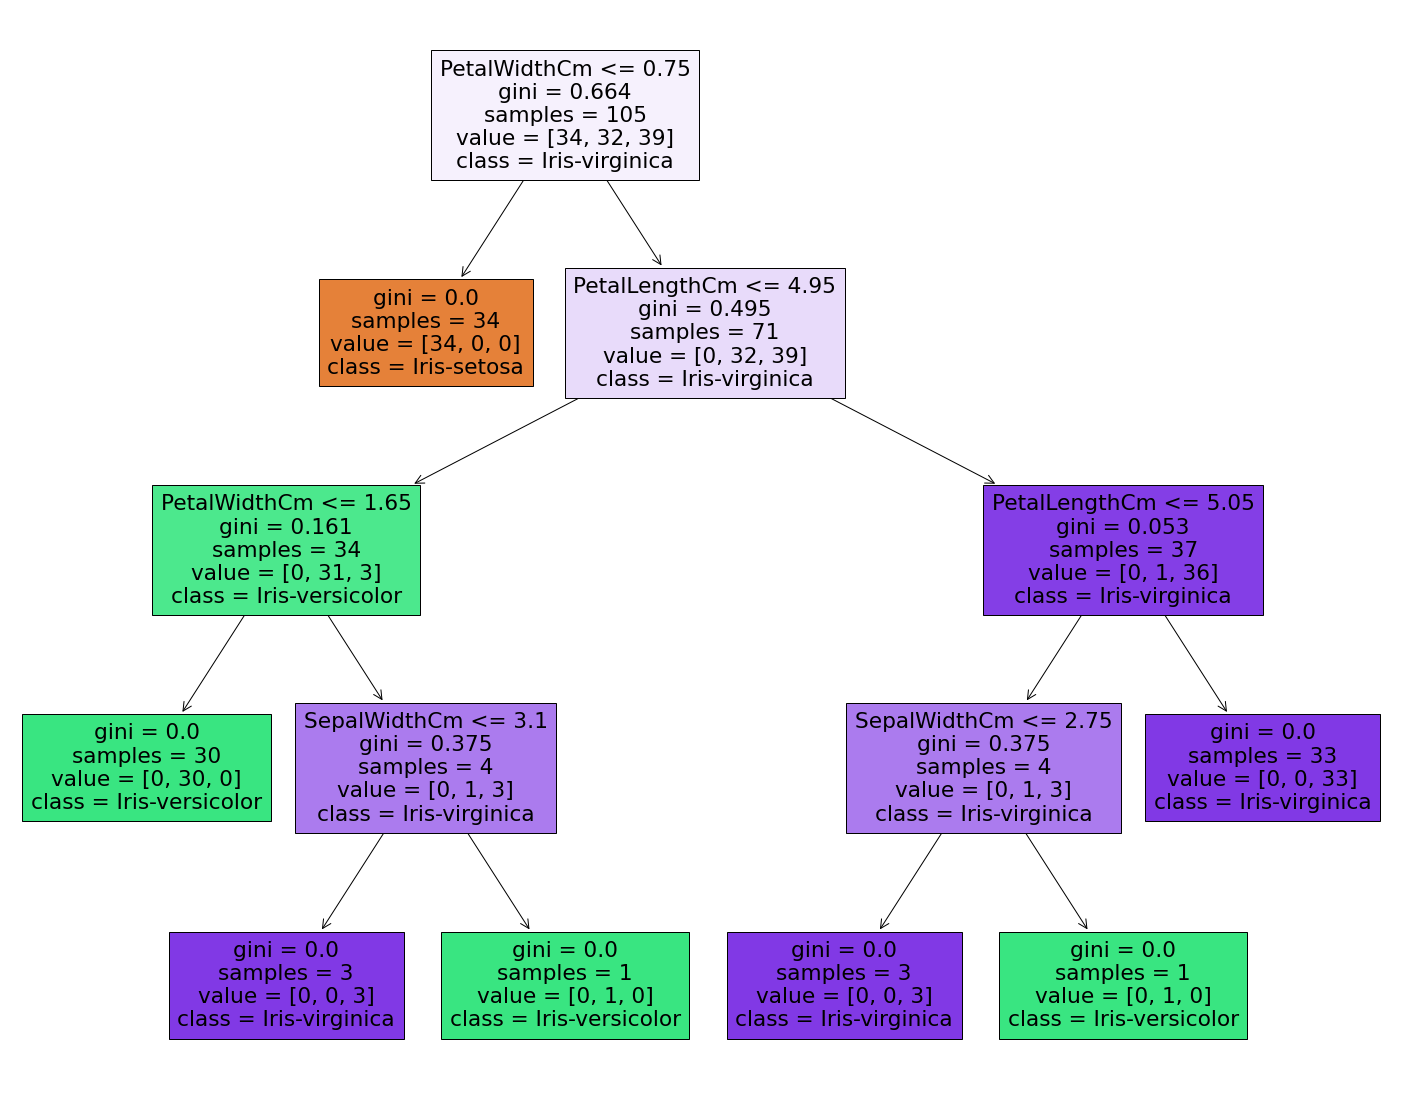

In [26]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(cf, 
                   feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  
                   class_names=['Iris-setosa','Iris-versicolor', 'Iris-virginica'],
                   filled=True)

In [27]:
iris_df['Species'].unique()

array([1, 2, 3], dtype=int64)

# 3. Support Vector Machine


In [28]:
from sklearn import svm

X= preprocessing.StandardScaler().fit(X).transform(X)


In [29]:
svm_parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

cv_method = KFold(n_splits=2, shuffle=True, random_state=seed)

gs_svm = GridSearchCV(svm.SVC(), 
                      param_grid=svm_parameters, 
                      cv=cv_method,
                      verbose=0,  # verbose: the higher, the more messages
                      n_jobs=-1)

svm_out=gs_svm.fit(X_train, y_train)

In [30]:
cf = svm_out.best_estimator_
cf.fit(X_train, y_train)
y_pred_train = cf.predict(X_train)
y_pred_test = cf.predict(X_test)
#Print the results of the fitting and hyperparameter optimization process
print('Decision Tree Results:')
print('Train Score: ', (metrics.accuracy_score(y_train, y_pred_train)).round(2))
print('Test Score: ', (metrics.accuracy_score(y_test, y_pred_test)).round(2))
print('\n')
#If you want to explore what the best parameters are for the given model with the given data,
#run the below command
gs_svm.best_params_

Decision Tree Results:
Train Score:  0.98
Test Score:  0.98




{'kernel': 'linear'}

Therefore the best accuracy was obtained by using linear kernel

# 4. Logistic Regression


In [31]:
from sklearn.linear_model import LogisticRegression


In [32]:
LR_parameters = {'penalty': ['l1', 'l2', 'elasticnet']}

cv_method = KFold(n_splits=2, shuffle=True, random_state=seed)

gs_LR = GridSearchCV(LogisticRegression(), 
                      param_grid=LR_parameters, 
                      cv=cv_method,
                      verbose=0,  # verbose: the higher, the more messages
                      n_jobs=-1)

LR_out=gs_LR.fit(X_train, y_train)

In [33]:
cf = LR_out.best_estimator_
cf.fit(X_train, y_train)
y_pred_train = cf.predict(X_train)
y_pred_test = cf.predict(X_test)
#Print the results of the fitting and hyperparameter optimization process
print('Decision Tree Results:')
print('Train Score: ', (metrics.accuracy_score(y_train, y_pred_train)).round(2))
print('Test Score: ', (metrics.accuracy_score(y_test, y_pred_test)).round(2))
print('\n')
#If you want to explore what the best parameters are for the given model with the given data,
#run the below command
gs_LR.best_params_

Decision Tree Results:
Train Score:  0.98
Test Score:  0.98




{'penalty': 'l2'}

# 5. Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier


In [35]:
RF_parameters = {'criterion': ['gini', 'entropy']}

cv_method = KFold(n_splits=2, shuffle=True, random_state=seed)

gs_RF = GridSearchCV(RandomForestClassifier(), 
                      param_grid=RF_parameters, 
                      cv=cv_method,
                      verbose=0,  # verbose: the higher, the more messages
                      n_jobs=-1)

RF_out=gs_RF.fit(X_train, y_train)

In [36]:
cf = RF_out.best_estimator_
cf.fit(X_train, y_train)
y_pred_train = cf.predict(X_train)
y_pred_test = cf.predict(X_test)
#Print the results of the fitting and hyperparameter optimization process
print('Decision Tree Results:')
print('Train Score: ', (metrics.accuracy_score(y_train, y_pred_train)).round(2))
print('Test Score: ', (metrics.accuracy_score(y_test, y_pred_test)).round(2))
print('\n')
#If you want to explore what the best parameters are for the given model with the given data,
#run the below command
gs_RF.best_params_

Decision Tree Results:
Train Score:  1.0
Test Score:  0.98




{'criterion': 'gini'}

Therefore best accuracy was obtained by using gini criterion